In [ ]:
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm

## Get the training and test set

Remember that in classification, which is a form of supervised machine learning, we must use a training set to teach our model how to correctly classify future examples. We also use a test set to test how good our model is.

Our next step is to load the train and test set for our data, which we've implemented for you.

In [ ]:
train_url = 'https://raw.githubusercontent.com/eliaszwang/AI4ALL2020/master/data/pd_labeled-data-singlelabels-train.csv'
test_url  = 'https://raw.githubusercontent.com/eliaszwang/AI4ALL2020/master/data/pd_labeled-data-singlelabels-test.csv'
df_train = pd.read_csv(train_url)
df_test  = pd.read_csv(test_url)

train_tweets  = df_train['Text']
train_classes = df_train['Class']

test_tweets  = df_test['Text']
test_classes = df_test['Class']

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer()

vec_train_tweets = vectorizer.fit_transform(train_tweets)
vec_test_tweets  = vectorizer.transform(test_tweets)

## Classification

In this lesson, we'll use the **Decision Tree** algorithm for classification on our twitter dataset. 

We'll leverage the scikit-learn library for this task. Scikit-learn is a powerful library because it allows us to easily apply all of the machine learning concepts that we've learned to real datasets with just a few lines of code.

Our goal is to train a machine learning system to be able to take a new tweet and predict which category it is. 


Print out how many items are in the train and test sets. Does this distribution make sense to you? 

In [ ]:
### YOUR CODE HERE ####
# Print number of training tweets 

# Print number of test tweets 

### END CODE HERE ####

Our training set contains all of the correct targets (classes) for our tweets, along with the four features of each tweet. We'll need all of this information to teach our classifier how to predict a class given a new set of four features.

## Training our decision tree

Now that we've split our data into a training set and a test set, it's time to train our decision tree.

In [ ]:
# sklearn has classifiers built in
# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier with a max_depth of 30
dt_classifier = DecisionTreeClassifier(max_depth=30)

# Fit the classifier to the training set. This is the template you should use. 
# dt_classifier.fit(<insert train tweets variable>, <insert labels for training tweets variable>)

### YOUR CODE HERE ####

### END CODE HERE ####

One of the major advantages with using a Decision Tree is that we can see visually how it makes its decisions. This **transparency** is not true for all models and is actually one of the big research questions in AI today.

For example, machine learning is often used in government agencies today. If a model makes a decision that can affect whether someone gets health care or a loan, they should be able to ask *why* the system made the decision that it did.

Let's visualize the decision tree below:

In [ ]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(dt_classifier, out_file=None, impurity=False) 
graph = graphviz.Source(dot_data) 
graph

It takes some practice to read the visualization of the decision tree, but it's actually quite informative. The root node of the decision tree starts with the line `X[1127] <= 0.015.`  This is the condition that splits the tree. In this case, it's saying that we should look at the feature with index 1227 and see if it's less than or equal to 0.015. But how do we know what the feature at index 1227 is? 

We can get a list of all the features for our tweets from the vectorizer object we created earlier. Run the next block of code to discover that the feature at index 1227 is "food". 



In [ ]:
features = vectorizer.get_feature_names()
print("Feature at index 1227 is: ", features[1227])


Therefore, the tree tells us that if the feature corresponding to the word "food" is  <= 0.015, then we will follow the tree to the left child. If this is false, we will follow the tree to the right child.

The `samples = 652` line means that at this node, we still have 652 samples to look at.

The `[135,138,44,243,92]` line tells us that of these 652 samples, 135 are the zeroth class (Energy), 138 are the first class (Food), 44 are the second class (Medical), 243 are the third class (None), and 92 are the last class (Water).

We can follow the visualization for the rest of the decision tree to see what feature it splits on at each node. 

Write code to determine what the features used to split the tree at the next two levels are.  

Question: why does feature 2634 appear twice? 

In [ ]:
# Tree structure
# root 1227 
# -> 3351 
#   -> 347
#   -> 2634
# -> 2634
#   -> 2936
#   -> 3301

### YOUR CODE HERE ####
# Features for level 1 of the tree

# Left tree
# Right tree

# Features for level 2 of the tree
# Left tree


# Right tree

### END CODE HERE ####

## Testing our decision tree

We've trained our decision tree and visualized it, but we have not yet tested it to see how well it does. This is where the test set comes in -- the test set is a set of correctly labelled examples that we have withheld from the decision tree, so we can test to see if the predictions made by the decision tree match the correct labels.

With `sklearn`, it's really easy to generate our predicted labels for the test set:

In [ ]:
# Create a list of predicted classes for each of the examples in the test set. 
# Use the predict function for our classifier object with the following syntax: 
# dt_predicted_classes = dt_classifier.predict(<insert test tweets variable>)

### YOUR CODE HERE ####

### END CODE HERE ####

In order to find the accuracy of our classifier on the test set, we use the function `score()`, which takes two parameters: (1) the data of the test set, and (2) the correct labels of the test set.

It will automatically compare our predicted label with the correct label to compute the accuracy.

Calculate the accuracy of your classifier by using the DecisionTree library's score function.  
The accuracy of a random classifier is 20\%... Why? 

In [ ]:
#### YOUR CODE HERE ####

#### END CODE HERE ####

Calculate the average f1 score of your classifier by using f1_score() function. 

In [ ]:
#### YOUR CODE HERE ####

#### END CODE HERE ####

And we're done! In a few lines of code, we've actually:

*  Loaded our dataset
*  Picked our classifier to use
* Trained our classifier on the dataset
* Tested our classifier on unseen data

If we are satisfied with the performance of our classifier on the test set, we're ready to go, to use this model on real data in the real world!

## The Confusion Matrix

The code above told us how accurate the decision tree was, but what if we wanted some more details about which sorts of classifications we got right and wrong? That's where the confusion matrix comes in.

We'll use the familiar `matplotlib` library to accomplish this visualization, but we'll also use a library called `seaborn` to make our visualization look a bit nicer:

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = confusion_matrix(test_classes,dt_predicted_classes)
cm_df = pd.DataFrame(
    confusion_matrix, 
    index = [idx for idx in ['Energy', 'Food', 'Medical', 'None', 'Water']],
    columns = [col for col in ['Energy (pred)', 'Food (pred)', 'Medical (pred)', 'None (pred)', 'Water (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True)
plt.show()

Our confusion matrix in this case is a 5x5 table, because there are 5 different possible classes for each tweet. The columns tell us what class we predicted, whereas the rows tell us what the actual class is.


## k-Nearest Neighbor Classifier

In [ ]:
# We're going to import the decision tree classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

We first need to select our parameter k. We'll use 10-fold cross validation for this (the image below shows 5-fold cross validation), and we'll make use of sklearn's cross_val_score function. 

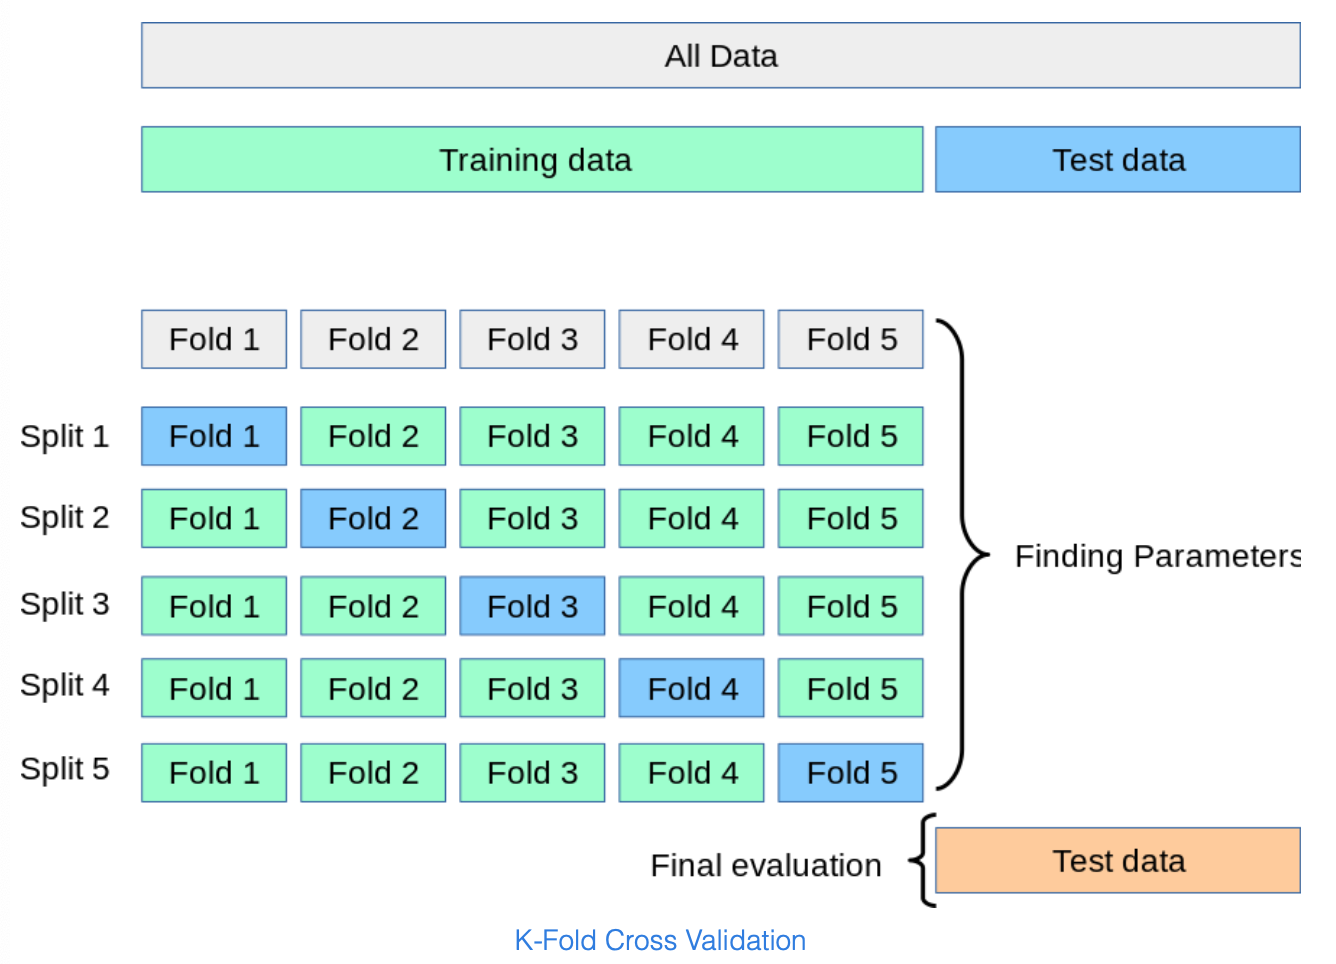

Source: Kevin Zakka

In [ ]:
cv_scores = []
kParam = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

for k in kParam: 
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, vec_train_tweets, train_classes, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Plot the cross validation scores and select the best k parameter. 

In [ ]:
#### YOUR CODE HERE ####
# Hint: what are the axis of the graph that you want to plot? 

#### END CODE HERE ####

### Knowledge Check
Why does the accuracy decrease was the number of neighbors is too large? too small? 


Evaluate your model on the test set. Get the model's accuracy and average f1 score. 

In [ ]:
#### YOUR CODE HERE ####
# make a k neighbors classifier using KNeighborsClassifier

# fit the classifier to training tweets and labels 

# find the accuracy of the model

# find the predicted classes 

# compute the F1 Score 

#### END CODE HERE ####

## Challenge: Implement k-Nearest Neighbors yourself! 

In [ ]:
from scipy.sparse.linalg import norm

def compute_distances(train_tweets, test_tweet):
  """
  Compute the distance between the given test tweet and each tweet in the 
  training set. 

  Returns:
  - dists: A list of length (num_train_tweets) where dists[i]
    is the Euclidean distance between the ith tweet in the train set and the jth
    training point.
  """
  #### YOUR CODE HERE ####
  # Hint use the norm() function to get the distance between the test tweet
  # and the train tweet


  #### END CODE HERE ####

In [ ]:
def predict_classes(k, train_tweets, test_tweets): 
    """
      Predict the classes for the given test_tweets. 
      For each tweet, 
        get the distances from the tweet to each tweet in the train set 
        use the distances to get the indices of the k closest tweets
        select the most common index in the k closest indices 
        get the class associated with the training tweet at the most common index 
        return this class

      Returns:
      - predicted_classes: a list of the predicted classes for the test tweets 
      """
  #### YOUR CODE HERE ####
    predicted_classes = []
    # Hint: iterate through each test tweet
 
        # Hint: find distance to all training tweets from test tweet

        
        # Hint: sort distances 

        
        # look at k closest distances 

        
        # find the most common label

        
    return predicted_classes
  #### END CODE HERE ####

In [ ]:
myknn_predicted_classes = predict_classes(3, vec_train_tweets, vec_test_tweets)

Calculate the accuracy of your classifier by using the accuracy_score() function. 

In [ ]:
#### YOUR CODE HERE ####

#### END CODE HERE ####

Calculate the average f1 score of your classifier by using f1_score() function. 

In [ ]:
#### YOUR CODE HERE ####

#### END CODE HERE ####